# Titanic

This is the beginning of my first notebook. I'm going to blaze through the code without much explanation.. because explanation should be fairly obvious based on the function names. Also, this project is just to get my feet wet, not necessarily teach anyone anything.

## Attribution

Most code is copied or influenced from this [kaggle kernel](https://www.kaggle.com/zlatankr/titanic/titanic-random-forest-82-78)

In [1]:
import os
import ryan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


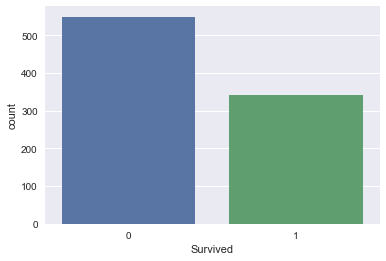

In [4]:
sns.countplot(train['Survived'])

In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [7]:
survivedGBPclass = train['Survived'].groupby(train['Pclass'])
dir(survivedGBPclass)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__format__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__iter__',
 '__len__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_agg_doc',
 '_aggregate',
 '_aggregate_multiple_funcs',
 '_aggregate_named',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_builtin_table',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_def_str',
 '_dir_additions',
 '_dir_deletions',
 '_get_index',
 '_get_indices',
 '_gotitem',
 '_group_selection',
 '_index_with_as_index',
 '_internal_names',
 '_internal_names_set',
 '_is_builtin_func',
 '_is_cython_func',
 '_iterate_slices',
 '_make_wrapper',
 '_obj_with_exclusions',
 '_python_agg_general',
 '_python

In [8]:
survivedGBPclass.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [9]:
survivedGBPclass.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

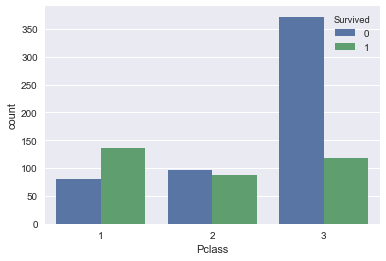

In [15]:
sns.countplot(train['Pclass'], hue=train['Survived'])

In [18]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [26]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

In [27]:
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Capt.          1
Sir.           1
the            1
Don.           1
Jonkheer.      1
Ms.            1
Mme.           1
Lady.          1
Name: Name_Title, dtype: int64

In [28]:
train['Survived'].groupby(train['Name_Title']).value_counts()

Name_Title  Survived
Capt.       0             1
Col.        0             1
            1             1
Don.        0             1
Dr.         0             4
            1             3
Jonkheer.   0             1
Lady.       1             1
Major.      0             1
            1             1
Master.     1            23
            0            17
Miss.       1           127
            0            55
Mlle.       1             2
Mme.        1             1
Mr.         0           436
            1            81
Mrs.        1            99
            0            26
Ms.         1             1
Rev.        0             6
Sir.        1             1
the         1             1
Name: Survived, dtype: int64

In [29]:
train['Survived'].groupby(train['Name_Title']).mean()

Name_Title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64